## From Data Visualization to Hypothesis Testing in Python: A Practical Approach using ANOVA (part 2)

You can visit my article on Medium where I give a thorough explanation of how to conduct t-test in this notebook. The link is here: https://medium.com/@miraismira/from-data-visualization-to-hypothesis-testing-in-python-t-test-part-1-1260ab651801

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("StudentsPerformance_edit.csv")
df.head()

,gender,ethnicity,parents_edu,lunch,prep_course,math_score,read_score,write_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Sampling data
g_a = df[df.ethnicity=="group A"].sample(n=40, random_state=123)
g_b = df[df.ethnicity=="group B"].sample(n=40, random_state=123)
g_c = df[df.ethnicity=="group C"].sample(n=40, random_state=123)
g_d = df[df.ethnicity=="group D"].sample(n=40, random_state=123)
g_e = df[df.ethnicity=="group E"].sample(n=40, random_state=123)

#Concatenate the sample data
sample_group = pd.concat([g_a, g_b, g_c, g_d, g_e], ignore_index=True)

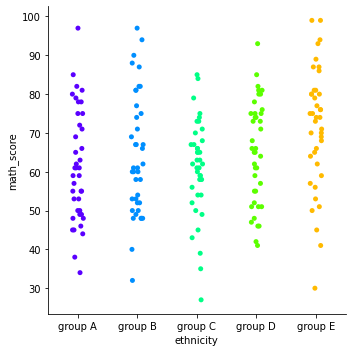

In [5]:
sns.catplot(data=sample_group, x="ethnicity", 
            y="math_score", palette="gist_rainbow_r")

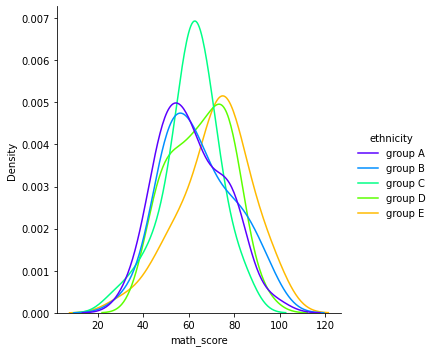

In [6]:
sns.displot(data=sample_group,  x="math_score", 
            hue="ethnicity", kind="kde", 
            palette="gist_rainbow_r")

<AxesSubplot:xlabel='math_score', ylabel='ethnicity'>

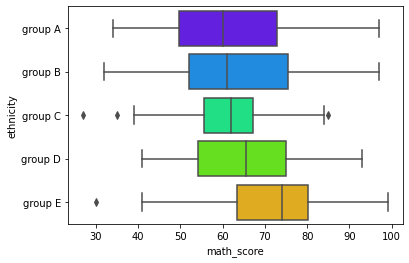

In [7]:
sns.boxplot(data=sample_group,  x="math_score", y="ethnicity", 
            palette="gist_rainbow_r")

<AxesSubplot:xlabel='ethnicity', ylabel='math_score'>

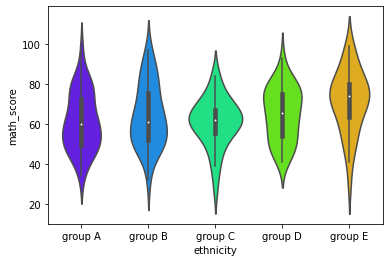

In [8]:
sns.violinplot(data=sample_group,  x="ethnicity", y="math_score", palette="gist_rainbow_r")

In [9]:
name = sorted(df["ethnicity"].unique())
group = [g_a, g_b, g_c, g_d, g_e]
mean_value = []
std_value = []

for group in group:
    mean = group["math_score"].mean()
    std = group["math_score"].std()
    mean_value.append(mean)
    std_value.append(std)

table_sample = pd.DataFrame(list(zip(name, mean_value, std_value)),
                           columns=["group name", "mean", "std"])
table_sample
  

,group name,mean,std
0,group A,61.325,14.417560
1,group B,64.300,15.607690
2,group C,61.025,12.292352
3,group D,65.125,13.301605
4,group E,71.550,15.582617


In [11]:
# Normality test
from scipy.stats import shapiro

name = sorted(df["ethnicity"].unique())
group = [g_a, g_b, g_c, g_d, g_e]
t_stat = []
p_value = []
normality = []

for group in group:
    t, p = shapiro(group["math_score"])
    t_stat.append(t)
    p_value.append(p)
    
    if p > 0.05:
        normality.append("Yes")
    else:
        normality.append("No")
 
#Creating table for normality result
normality_result = pd.DataFrame(list(zip(name, t_stat, p_value, normality)),
                           columns=["group name", "t value", "p value",
                                    "normality"])
normality_result   

,group name,t value,p value,normality
0,group A,0.972988,0.445151,Yes
1,group B,0.966704,0.281612,Yes
2,group C,0.970285,0.367457,Yes
3,group D,0.967011,0.288237,Yes
4,group E,0.975667,0.532642,Yes


In [12]:
# Levene test for equal variances
from scipy.stats import levene

t, p = levene(g_a["math_score"], g_b["math_score"], g_c["math_score"], 
              g_d["math_score"], g_e["math_score"])

if p > 0.05:
    print("t_value: {} | p_value: {}  | all samples have equal variances".format(t, p))
else:
    print("t_value: {} | p_value: {}  | samples have unequal variances".format(t,p))

t_value: 0.96077839151162 | p_value: 0.430183478668795  | all samples have equal variances


In [15]:
# Anova test
from scipy.stats import f_oneway

f, p = f_oneway(g_a["math_score"], g_b["math_score"], g_c["math_score"],
                g_d["math_score"], g_e["math_score"])

if p > 0.05:
    print("f statistic: {:4f} | p-value: {:4f}  | there's no differences in mean groups".
         format(f, p))
else:
    print("f statistic: {:4f} | p-value: {:4f}  | at least one mean is different".
         format(f, p))    

f statistic: 3.528902 | p-value: 0.008326  | at least one mean is different


In [14]:
#Post-hoc analysis
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(sample_group['math_score'], 
                          sample_group['ethnicity'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
group A,group B,2.975,0.8848,-5.8289,11.7789,False
group A,group C,-0.3,1.0,-9.1039,8.5039,False
group A,group D,3.8,0.758,-5.0039,12.6039,False
group A,group E,10.225,0.0138,1.4211,19.0289,True
group B,group C,-3.275,0.8439,-12.0789,5.5289,False
group B,group D,0.825,0.999,-7.9789,9.6289,False
group B,group E,7.25,0.16,-1.5539,16.0539,False
group C,group D,4.1,0.7024,-4.7039,12.9039,False
group C,group E,10.525,0.0103,1.7211,19.3289,True
group D,group E,6.425,0.2653,-2.3789,15.2289,False
